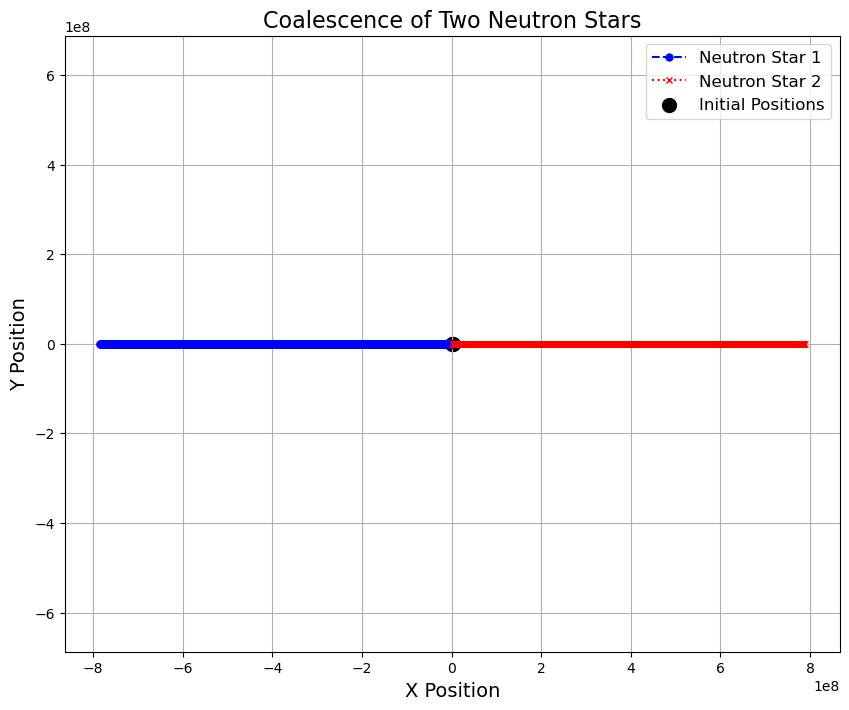

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class NeutronStarSolver:
    '''
    This class simulates the coalescence of two neutron stars under the influence of gravity.
    '''
    def __init__(self, m_ns1, m_ns2, r_start1, r_start2, v_start1, v_start2, G=6.67430e-11):
        self.G = G
        self.m_ns1 = m_ns1
        self.m_ns2 = m_ns2
        self.r_start1 = r_start1
        self.r_start2 = r_start2
        self.v_start1 = v_start1
        self.v_start2 = v_start2
        self.r_ns1 = np.array(r_start1)  # Neutron star 1 initial position
        self.r_ns2 = np.array(r_start2)  # Neutron star 2 initial position
        self.v_ns1 = np.array(v_start1)  # Neutron star 1 initial velocity
        self.v_ns2 = np.array(v_start2)  # Neutron star 2 initial velocity

    def update_position_velocity(self, dt):
        r12 = self.r_ns2 - self.r_ns1
        r12_norm = np.linalg.norm(r12)
        F12 = self.G * self.m_ns1 * self.m_ns2 / r12_norm**3 * r12
        F21 = -F12

        self.r_ns1 = np.array(self.r_ns1, dtype=float)  # Convert self.r_ns1 to array with float data type
        self.v_ns1 = np.array(self.v_ns1, dtype=float)  # Convert self.v_ns1 to array with float data type
        self.r_ns2 = np.array(self.r_ns2, dtype=float)  # Convert self.r_ns2 to array with float data type
        self.v_ns2 = np.array(self.v_ns2, dtype=float)  # Convert self.v_ns2 to array with float data type
        
        # Update velocities
        self.v_ns1 += dt * F21 / self.m_ns1
        self.v_ns2 += dt * F12 / self.m_ns2
        
        # Update positions
        self.r_ns1 += dt * self.v_ns1
        self.r_ns2 += dt * self.v_ns2

def plot_coalescence(solver, num_steps, dt):
    positions1 = np.zeros((num_steps, 2))
    positions2 = np.zeros((num_steps, 2))
    for i in range(num_steps):
        positions1[i] = solver.r_ns1
        positions2[i] = solver.r_ns2
        solver.update_position_velocity(dt)
        
    plt.figure(figsize=(10, 8))
    plt.plot(positions1[:, 0], positions1[:, 1], label='Neutron Star 1', color='blue', linestyle='--', marker='o', markersize=5)
    plt.plot(positions2[:, 0], positions2[:, 1], label='Neutron Star 2', color='red', linestyle=':', marker='x', markersize=5)
    plt.scatter([positions1[0, 0], positions2[0, 0]], [positions1[0, 1], positions2[0, 1]], color='black', marker='o', s=100, label='Initial Positions')
    plt.xlabel('X Position', fontsize=14)
    plt.ylabel('Y Position', fontsize=14)
    plt.title('Coalescence of Two Neutron Stars', fontsize=16)
    plt.axis('equal')
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

# Parameters
m_ns1 = 1.4 * 1.988e30  # Mass of neutron star 1 in kg (assuming 1.4 solar masses)
m_ns2 = 1.4 * 1.988e30  # Mass of neutron star 2 in kg (assuming 1.4 solar masses)
r_start1 = np.array([0, 0])  # Initial position of neutron star 1 at origin
r_start2 = np.array([3e6, 0])  # Initial position of neutron star 2 at specified coordinates (x, y)
v_start1 = np.array([0, 0])  # Initial velocity of neutron star 1
v_start2 = np.array([0, 3000])  # Initial velocity of neutron star 2 along y-axis (assuming radial motion)
num_steps = 1000  # Number of time steps
dt = 0.1  # Time step size in seconds

# Create solver instance
solver = NeutronStarSolver(m_ns1, m_ns2, r_start1, r_start2, v_start1, v_start2)

# Plot coalescence
plot_coalescence(solver, num_steps, dt)
